<a href="https://colab.research.google.com/github/saeedzou/Deep-Learning-Project/blob/dev-saeed/coco_people_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import os
import cv2
import numpy as np
import torch
from pycocotools.coco import COCO
from torchvision import transforms
from torch.utils.data import Dataset


In [1]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip annotations_trainval2014.zip
!wget http://images.cocodataset.org/zips/train2014.zip
!unzip train2014.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2014/COCO_train2014_000000408557.jpg  
 extracting: train2014/COCO_train2014_000000013714.jpg  
 extracting: train2014/COCO_train2014_000000194043.jpg  
 extracting: train2014/COCO_train2014_000000219859.jpg  
 extracting: train2014/COCO_train2014_000000278135.jpg  
 extracting: train2014/COCO_train2014_000000141015.jpg  
 extracting: train2014/COCO_train2014_000000280923.jpg  
 extracting: train2014/COCO_train2014_000000200024.jpg  
 extracting: train2014/COCO_train2014_000000435713.jpg  
 extracting: train2014/COCO_train2014_000000249993.jpg  
 extracting: train2014/COCO_train2014_000000424160.jpg  
 extracting: train2014/COCO_train2014_000000142761.jpg  
 extracting: train2014/COCO_train2014_000000532668.jpg  
 extracting: train2014/COCO_train2014_000000564904.jpg  
 extracting: train2014/COCO_train2014_000000346384.jpg  
 extracting: train2014/COCO_train2014_000000560934.jpg  
 extracting: train2014/COCO_train2014

In [2]:
import json
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import torch
# Load the annotations file
annFile = '/content/annotations/instances_train2014.json'
coco = COCO(annFile)

# Get the list of image IDs that have people in them
catIds = coco.getCatIds(catNms=['person'])
imgIds = coco.getImgIds(catIds=catIds)
# create a dataset of images with people in them
dataset = []
for imgId in imgIds:
    img = coco.loadImgs(imgId)[0]
    dataset.append(img)
# count the number of images in the dataset
print(len(dataset))

loading annotations into memory...
Done (t=16.76s)
creating index...
index created!
45174


In [19]:
import json
import os
import cv2
import numpy as np
import torch
from pycocotools.coco import COCO
from torchvision import transforms
from torch.utils.data import Dataset

class COCOPeopleDataset(Dataset):
    def __init__(self, annFile, transforms=None):
        self.coco = COCO(annFile)
        self.imgIds = self.coco.getImgIds(catIds=self.coco.getCatIds(catNms=['person']))
        self.transforms = transforms

    def __len__(self):
        return len(self.imgIds)

    def __getitem__(self, idx):
        img = self.coco.loadImgs(self.imgIds[idx])[0]
        path = os.path.join('train2014/', img['file_name'])
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image.astype(np.float32) / 255.0

        if self.transforms is not None:
            image = self.transforms(image)

        return image

# Apply desired transformations
transforms = transforms.Compose([transforms.ToTensor(), transforms.Resize((224, 224)), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# Create the dataset
dataset = COCOPeopleDataset(annFile='/content/annotations/instances_train2014.json', transforms=transforms)


loading annotations into memory...
Done (t=21.77s)
creating index...
index created!


In [20]:
dataset[0].shape

torch.Size([3, 224, 224])

In [15]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True, num_workers=2)

torch.Size([32, 3, 224, 224])


0 torch.Size([32, 3, 224, 224])


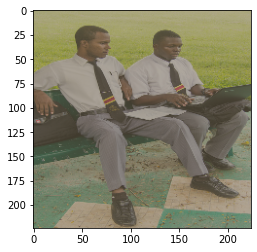

1 torch.Size([32, 3, 224, 224])


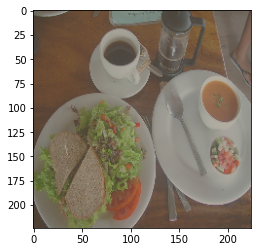

2 torch.Size([32, 3, 224, 224])


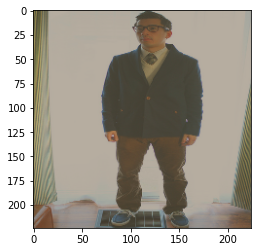

3 torch.Size([32, 3, 224, 224])


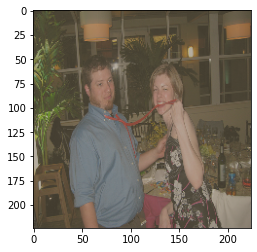

In [25]:
for i, data in enumerate(dataloader):
    print(i, data.shape)
    data = data * torch.tensor([0.229, 0.224, 0.225]).view(3, 1, 1) + torch.tensor([0.485, 0.456, 0.406]).view(3, 1, 1)
    plt.imshow(data[0].permute(1, 2, 0))
    plt.show()
    if i == 3:
        break